# Rectangular Wing

## Problem Description

Test of a very simple rectangular wing with the following characteristics:
- Area: 20 m²
- Span: 10 m
- Root Chord: 2 m
- Tip Chord: 2 m

The flight conditions are as follows:
- Altitude: 0 m
- Velocity: 100 m/s
- Angle of Attack (alpha): 2º
- Angle of Sideslip (beta): 0

The aerodynamic grid is composed of:
- 6 panels spanwise
- 3 panels chordwise

The wing structure is composed of a single beam located at the middle of the chord, the beam has it's translations and rotations at the wing root.

The beam is represented using 12 euler beam elements, therefore each aerodynamic panel has two elements.

The aerodynamic loads are applied at the node at the center of the aerodynamic panel.

The beam is made out of aluminium with the following properties:
- Name: Aluminium 1199
- Density (rho): 2700 kg/m³
- Modulus of Elasticity (E): 68e9 Pa
- Shear Modulus (G): 25e9 Pa
- Poisson's Ration (v): 0.36

The beam section is a circle with a radius of 0.05 m and the following properties:
- Area: 7.854e-3
- Moment of Inertia (Izz): 4.909e-6
- Moment of Inertia (Iyy): 4.909e-6
- Polar Moment of Inertia (J): 9.817e-6

## Imports

In [58]:
# Python Imports
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
%matplotlib notebook

# Autoreload Extension
%load_ext autoreload
%autoreload 2

# SRC imports
from context import src
from src import atmosphere
from src import basic_objects
from src import finite_element_method
from src import geometry
from src import mesh
from src import translator
from src import vortex_lattice_method
from src import visualization

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Wing Definition

In [5]:
# Wing Properties
wing_area = 20
aspect_ratio = 5
taper_ratio = 1
sweep_quarter_chord = 0
dihedral = 0
incidence = 0
torsion = 0
position = [0, 0, 0]

# Creation of the wing object
wing = basic_objects.Wing(wing_area, aspect_ratio, taper_ratio, sweep_quarter_chord, dihedral,
                          incidence, torsion, position)

## Aerodynamic Mesh Definition

In [6]:
# Mesh Properties
n_semi_wingspam_panels = 3
n_chord_panels = 3
wingspam_discretization_type = "linear"
chord_discretization_type = "linear"

# Creation of the mesh
xx, yy, zz = mesh.generate_mesh(wing, n_semi_wingspam_panels, n_chord_panels,
                                wingspam_discretization_type, chord_discretization_type)

<IPython.core.display.Javascript object>


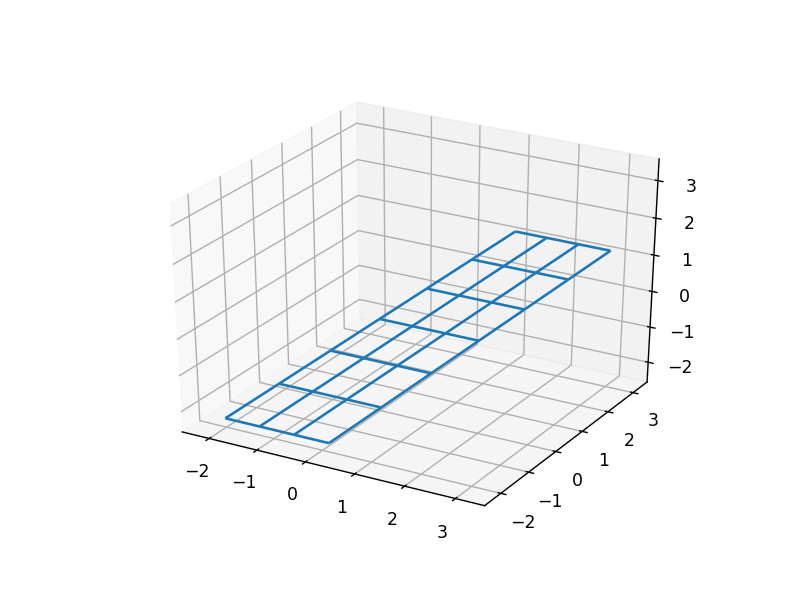

In [7]:
visualization.plot_mesh(xx, yy, zz)

## Flight Conditions Definition

In [18]:
alpha = 2
beta = 0
gamma = 0
attitude_vector = [alpha, beta, gamma]
altitude = 0
density, pressure, temperature = atmosphere.ISA(altitude)
true_airspeed = 100
flow_velocity_vector = geometry.velocity_vector(true_airspeed, alpha, beta, gamma)[:,0]
infinity_mult = 25

## Material Definition

In [9]:
name = "Aluminium 7075-T6"
density = 2810
young_modulus = 7.170547E+10
shear_modulus = 2.69E+10
poisson_ratio = 0.33
yield_strength = 5.033172E+08
ultimate_strength = 5.722648E+08

mat_aluminium7075 = basic_objects.Material(name, young_modulus, shear_modulus, poisson_ratio, density, yield_strength, ultimate_strength)

## Section Definition

In [11]:
section_area = 7.854e-3
m_inertia_y = 4.909e-6
m_inertia_z = 4.909e-6
polar_moment = 9.817e-6
rotation = 0
Area: 7.854e-3
    
constraint = basic_objects.Constraint(1, [0, 0, 0, 0, 0, 0])
circular_section = basic_objects.Section(section_area, rotation, m_inertia_y, m_inertia_z, polar_moment)

## Structure Definition

In [12]:
structure_points = np.array([[1, -5, 0],
                             [1, -4.16667, 0],
                             [1, -3.33333, 0],
                             [1, -2.5, 0],
                             [1, -1.66667, 0],
                             [1, -0.83333, 0],
                             [1, 0, 0],
                             [1, 0.83333, 0],
                             [1, 1.66667, 0],
                             [1, 2.5, 0],
                             [1, 3.33333, 0],
                             [1, 4.16666, 0],
                             [1, 5, 0]])

left_wing_0 = basic_objects.Beam(structure_points, 0, 1, circular_section, mat_aluminium7075, 1)
left_wing_1 = basic_objects.Beam(structure_points, 1, 2, circular_section, mat_aluminium7075, 1)
left_wing_2 = basic_objects.Beam(structure_points, 2, 3, circular_section, mat_aluminium7075, 1)
left_wing_3 = basic_objects.Beam(structure_points, 3, 4, circular_section, mat_aluminium7075, 1)
left_wing_4 = basic_objects.Beam(structure_points, 4, 5, circular_section, mat_aluminium7075, 1)
left_wing_5 = basic_objects.Beam(structure_points, 5, 6, circular_section, mat_aluminium7075, 1)
right_wing_0 = basic_objects.Beam(structure_points, 6, 7, circular_section, mat_aluminium7075, 1)
right_wing_1 = basic_objects.Beam(structure_points, 7, 8, circular_section, mat_aluminium7075, 1)
right_wing_2 = basic_objects.Beam(structure_points, 8, 9, circular_section, mat_aluminium7075, 1)
right_wing_3 = basic_objects.Beam(structure_points, 9, 10, circular_section, mat_aluminium7075, 1)
right_wing_4 = basic_objects.Beam(structure_points, 10, 11, circular_section, mat_aluminium7075, 1)
right_wing_5 = basic_objects.Beam(structure_points, 11, 12, circular_section, mat_aluminium7075, 1)

structure_beams = [left_wing_0, left_wing_1, left_wing_2, left_wing_3, left_wing_4, left_wing_5,
                   right_wing_0, right_wing_1, right_wing_2, right_wing_3, right_wing_4, right_wing_5]

wing_structure = basic_objects.Structure(structure_points, structure_beams)

<IPython.core.display.Javascript object>


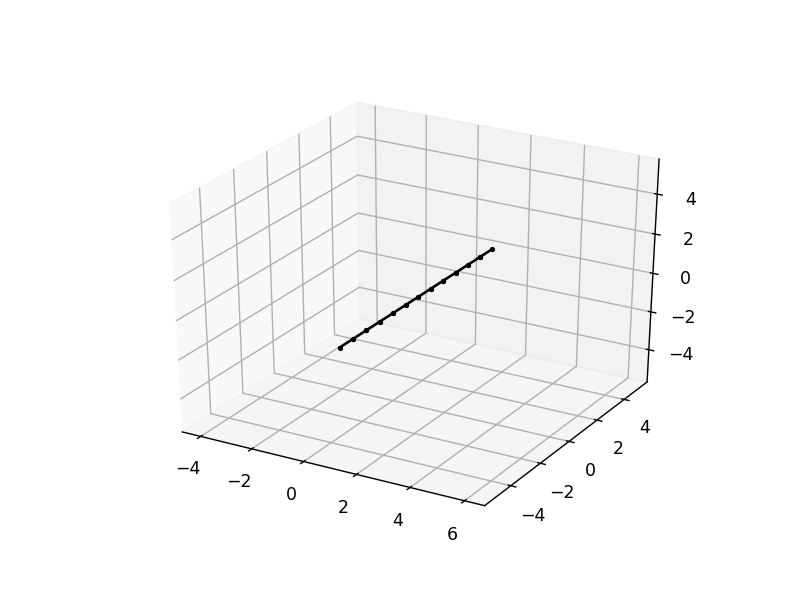

In [13]:
visualization.plot_structure(wing_structure)

<IPython.core.display.Javascript object>


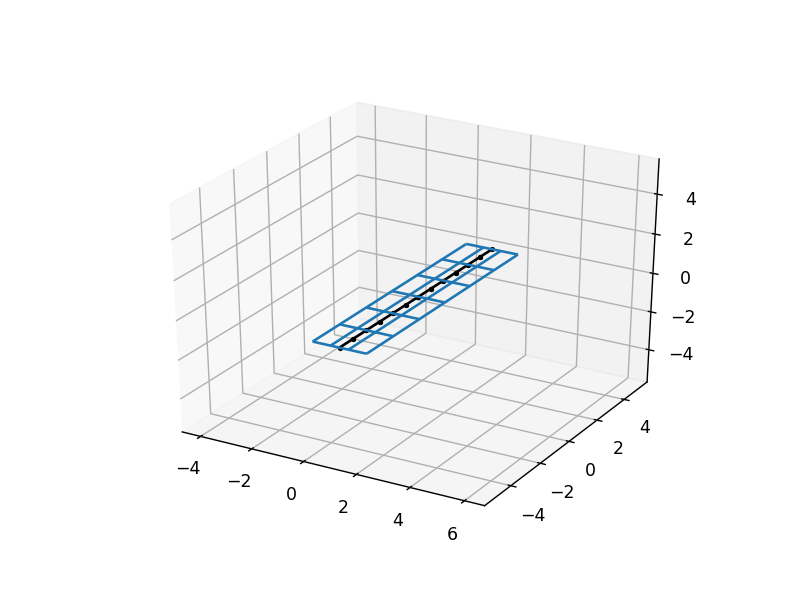

In [14]:
visualization.plot_aircraft(xx, yy, zz, wing_structure)

## Constrains Definition

In [62]:
constrain = basic_objects.Constraint(6, [0, 0, 0, 0, 0, 0])
constraints = [constrain]

## Aerodynamic Loads Calculation

In [19]:
panel_matrix = mesh.generate_panel_matrix(xx, yy, zz, wing.wing_span)
panel_vector = vortex_lattice_method.flatten(panel_matrix)
gamma = vortex_lattice_method.gamma_solver(panel_vector, flow_velocity_vector,
                                           infinity_mult * wing.wing_span)
downwash = vortex_lattice_method.downwash_solver(panel_vector, gamma)
lift, drag = vortex_lattice_method.lift_drag(panel_vector, gamma, downwash, true_airspeed, density)
gamma_matrix = np.reshape(gamma, np.shape(panel_matrix))
lift_matrix = np.reshape(lift, np.shape(panel_matrix))
drag_matrix = np.reshape(drag, np.shape(panel_matrix))

<IPython.core.display.Javascript object>


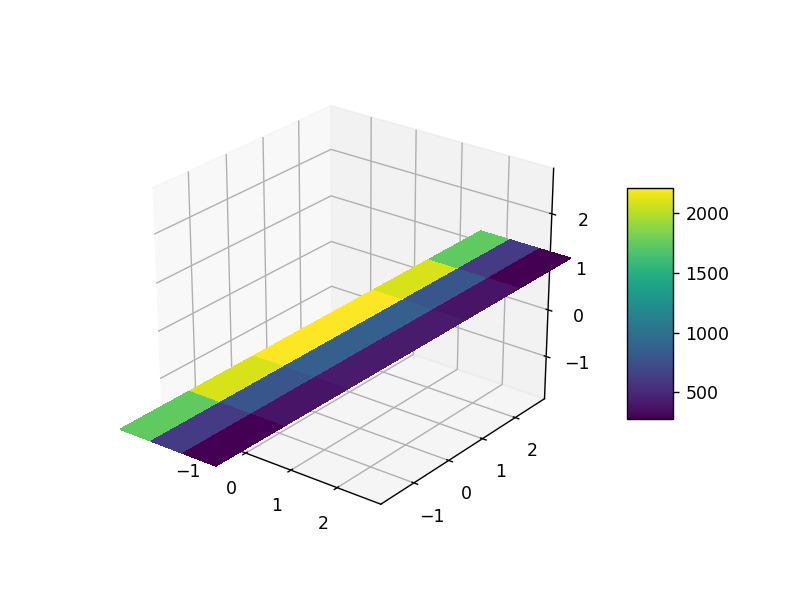

In [21]:
visualization.plot_results(xx, yy, zz, lift_matrix)

## Loads Translation

In [43]:
node_forces, node_moments = translator.node_loads(panel_matrix, lift_matrix, drag_matrix, structure_points)

In [68]:
loads = translator.loads_generator(node_forces, node_moments)          

## Structural Solver

In [78]:
deformed_grid, deformations, force_vector = finite_element_method.structural_solver(wing_structure, loads, constraints)

ZeroDivisionError: float division by zero